In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("C:/Users/vishw/Downloads/FuelConsumption.csv")

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
#making a dataframe of only those columns which are required.

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [ ]:
#pip install seaborn

In [8]:
import seaborn as sns

<AxesSubplot:>

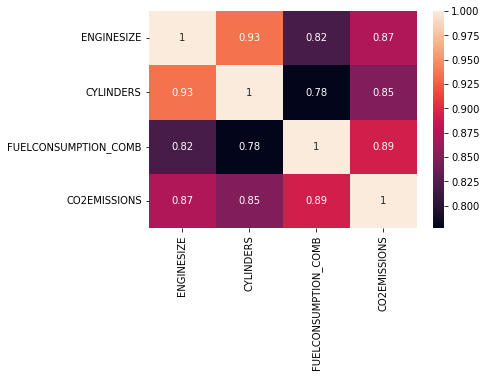

In [10]:
#Correlation matrix
sns.heatmap(cdf.corr(),annot=True)

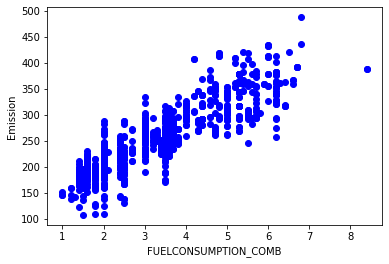

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [ ]:
#pip install scikit-learn

In [12]:
#partitioning the data into train set and test set
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

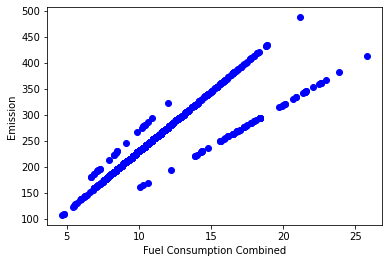

In [13]:
#Fuel Consumption vs CO2 emission scatter plot
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption Combined")
plt.ylabel("Emission")
plt.show()

In [15]:
#Fitting the Linear regression to training set
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[16.37929031]]
Intercept:  [66.68429572]


In [ ]:
#plotting the regression line

Text(0, 0.5, 'Emission')

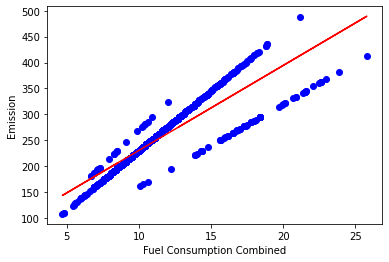

In [16]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Fuel Consumption Combined")
plt.ylabel("Emission")

In [ ]:
#checking preditction values for different data points from test set

In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
#predicting test set results
pred_y = regr.predict(test_x)
print(pred_y)


[[223.92548266]
 [248.49441812]
 [230.47719879]
 [307.45986323]
 [322.2012245 ]
 [210.82205042]
 [230.47719879]
 [238.66684394]
 [237.02891491]
 [282.89092777]
 [284.5288568 ]
 [253.40820522]
 [269.78749552]
 [277.97714067]
 [215.73583751]
 [320.56329547]
 [377.89081154]
 [204.2703343 ]
 [204.2703343 ]
 [215.73583751]
 [204.2703343 ]
 [223.92548266]
 [230.47719879]
 [228.83926976]
 [235.39098588]
 [266.51163746]
 [232.11512782]
 [274.70128261]
 [320.56329547]
 [202.63240527]
 [292.71850195]
 [292.71850195]
 [264.87370843]
 [268.14956649]
 [273.06335358]
 [255.04613425]
 [228.83926976]
 [227.20134073]
 [228.83926976]
 [227.20134073]
 [222.28755363]
 [232.11512782]
 [250.13234715]
 [253.40820522]
 [251.77027618]
 [307.45986323]
 [428.66661149]
 [258.32199231]
 [194.44276011]
 [436.85625664]
 [336.94258578]
 [361.51152124]
 [487.63205659]
 [489.26998562]
 [197.71861817]
 [233.75305685]
 [197.71861817]
 [196.08068914]
 [197.71861817]
 [202.63240527]
 [196.08068914]
 [199.35654721]
 [230.47

In [19]:
#evaluating the model
print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(pred_y , test_y) )

Mean absolute error: 18.02
Residual sum of squares (MSE): 676.50
R2-score: 0.80
